In [1]:
import tensorflow as tf
import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../../data.csv")

In [4]:
data = data.values
X = data[:,0:6]
y = data[:,6]

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2 , include_bias=False)

In [6]:
X=poly.fit_transform(X)
X.shape

(11077, 27)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
X_train.shape

(8861, 27)

In [9]:
model = keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(64, activation=tf.nn.swish),
                                    tf.keras.layers.Dense(128, activation=tf.nn.swish),
                                     tf.keras.layers.Dense(128, activation=tf.nn.sigmoid),
                                    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(16, activation=tf.nn.tanh),
                                    tf.keras.layers.Dense(7, activation=tf.nn.softmax)
                                   ])


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
hist=model.fit(X_train, y_train, epochs=80)

Epoch 1/80
277/277 [==============================] - 0s 1ms/step - loss: 1.3140 - accuracy: 0.4829
Epoch 2/80
277/277 [==============================] - 0s 1ms/step - loss: 1.0054 - accuracy: 0.5967
Epoch 3/80
277/277 [==============================] - 0s 1ms/step - loss: 0.9458 - accuracy: 0.6271
Epoch 4/80
277/277 [==============================] - 0s 1ms/step - loss: 0.8944 - accuracy: 0.6525
Epoch 5/80
277/277 [==============================] - 0s 1ms/step - loss: 0.8647 - accuracy: 0.6655
Epoch 6/80
277/277 [==============================] - 0s 1ms/step - loss: 0.8322 - accuracy: 0.6836
Epoch 7/80
277/277 [==============================] - 0s 1ms/step - loss: 0.8110 - accuracy: 0.6901
Epoch 8/80
277/277 [==============================] - 0s 1ms/step - loss: 0.8061 - accuracy: 0.6955
Epoch 9/80
277/277 [==============================] - 0s 1ms/step - loss: 0.7709 - accuracy: 0.7104
Epoch 10/80
277/277 [==============================] - 0s 1ms/step - loss: 0.7476 - accuracy: 0.7210

In [12]:
y_predict=model.predict_classes(X_test)
y_predict[0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


3

In [13]:
val_loss, val_acc = model.evaluate(X_test, y_test)

70/70 [==============================] - 0s 742us/step - loss: 0.8785 - accuracy: 0.7518


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 27)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1792      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 1

In [15]:
import matplotlib.pyplot as plt

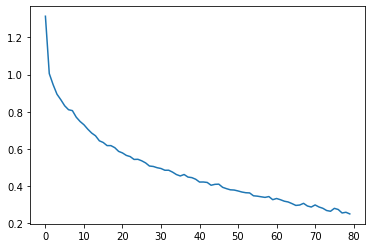

In [16]:
plt.plot(hist.history['loss'])

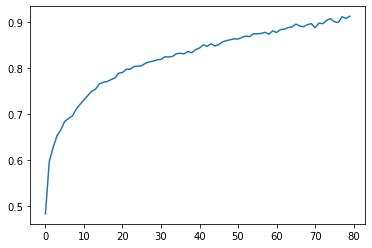

In [17]:
plt.plot(hist.history['accuracy'])

In [18]:
for key in hist.history.keys():
    print(key)

loss
accuracy


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         1.0       0.84      0.89      0.86       397
         2.0       0.85      0.82      0.83       366
         3.0       0.73      0.70      0.72       537
         4.0       0.58      0.50      0.54       204
         5.0       0.78      0.82      0.80       281
         6.0       0.67      0.71      0.69       431

    accuracy                           0.75      2216
   macro avg       0.74      0.74      0.74      2216
weighted avg       0.75      0.75      0.75      2216



In [20]:
keras.models.save_model(model,'Keras.h5')
# model.save(
#     'saved_model',
#     overwrite=True,
#     include_optimizer=True,
#     save_format=None,
#     signatures=None,
#     options=None,
# )

In [21]:
#load_model = keras.models.load_model('saved_model')
load_model = keras.models.load_model('Keras.h5')
load_y_predict=load_model.predict_classes(X_test)
load_y_predict[0]

3

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, load_y_predict))

              precision    recall  f1-score   support

         1.0       0.84      0.89      0.86       397
         2.0       0.85      0.82      0.83       366
         3.0       0.73      0.70      0.72       537
         4.0       0.58      0.50      0.54       204
         5.0       0.78      0.82      0.80       281
         6.0       0.67      0.71      0.69       431

    accuracy                           0.75      2216
   macro avg       0.74      0.74      0.74      2216
weighted avg       0.75      0.75      0.75      2216

